In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import plotly
import plotly.graph_objects as go
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, LSTM, Bidirectional
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.utils import np_utils
import tensorflow as tf
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
dataset_1 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_a_05.csv', sep=";")
dataset_2 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_d_04.csv', sep=";")
dataset_3 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_k_02.csv', sep=";")
dataset_4 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_bella.csv', sep=";")
dataset_5 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_s_03.csv', sep=";")
dataset_6 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_data_n_01.csv', sep=";")

In [3]:
dataset_7 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-04_21-25-09.csv', sep=";")
dataset_8 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-05_11-16-49.csv', sep=";")
dataset_9 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-07_14-13-59.csv', sep=";")
dataset_10 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-07_14-23-28.csv', sep=";")
dataset_11 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-07_17-08-27.csv', sep=";")
dataset_12 = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/my_python/_labelled_data/preprocessed_2020-07-07_17-17-38.csv', sep=";")


In [4]:
dataset_1_x = dataset_1[['left1','left2','right2','right2.1']]
dataset_2_x = dataset_2[['left1','left2','right2','right2.1']]
dataset_3_x = dataset_3[['left1','left2','right2','right2.1']]
dataset_4_x = dataset_4[['left1','left2','right2','right2.1']]
dataset_5_x = dataset_5[['left1','left2','right2','right2.1']]
dataset_6_x = dataset_6[['left1','left2','right2','right2.1']]

In [5]:
dataset_7_x = dataset_7[['left1','left2','right2','right2.1']]
dataset_8_x = dataset_8[['left1','left2','right2','right2.1']]
dataset_9_x = dataset_9[['left1','left2','right2','right2.1']]
dataset_10_x = dataset_10[['left1','left2','right2','right2.1']]
dataset_11_x = dataset_11[['left1','left2','right2','right2.1']]
dataset_12_x = dataset_12[['left1','left2','right2','right2.1']]


In [6]:
### build a combined dataframe with the sensor data of datasets for training (X Values)
### concat all .CSVs except dataset 6 for global holdout and later prediction


data_x_all = pd.concat([dataset_1_x,dataset_2_x,dataset_3_x,dataset_4_x,dataset_5_x,dataset_7_x,dataset_8_x,dataset_9_x,dataset_10_x,dataset_11_x,dataset_12_x])


data_x_all.shape

(266156, 4)

In [7]:
dataset_1_y = dataset_1['label']
dataset_2_y = dataset_2['label']
dataset_3_y = dataset_3['label']
dataset_4_y = dataset_4['label']
dataset_5_y = dataset_5['label']
dataset_6_y = dataset_6['label']

In [8]:
dataset_7_y = dataset_7['label']
dataset_8_y = dataset_8['label']
dataset_9_y = dataset_9['label']
dataset_10_y = dataset_10['label']
dataset_11_y = dataset_11['label']
dataset_12_y = dataset_12['label']


In [9]:
### build a combined dataframe with the label data of datasets for training (Y Values) 
## except dataset 6 for later evaluation

data_y_all = pd.concat([dataset_1_y,dataset_2_y,dataset_3_y,dataset_4_y,dataset_5_y,dataset_7_y,dataset_8_y,dataset_9_y,dataset_10_y,dataset_11_y,dataset_12_y])

data_y_all.shape

(266156,)

In [10]:
### binarize the label data: 0 for no event, 1 for any face touch
data_y_all = (data_y_all > 0.5).astype(np.int_)
data_y_all.shape

(266156,)

In [11]:
data_y_all_cat = pd.DataFrame(np_utils.to_categorical(data_y_all))
data_y_all_cat.shape

(266156, 2)

In [12]:
data_y_all_cat.iloc[20000:20003]

,0,1
20000,1.0,0.0
20001,1.0,0.0
20002,1.0,0.0


In [146]:
time_steps_in_partition=200

In [147]:
### partition the data into sections of 100 timesteps with a 95% overlap over the previous section

data_in_partitions = []

for i in range(0,data_x_all.shape[0]-time_steps_in_partition,int(time_steps_in_partition/20)):
    data_in_partitions.append(data_x_all.iloc[i:i+time_steps_in_partition])

data_x_part = np.array(data_in_partitions)
data_x_part.shape

(26596, 200, 4)

In [148]:
### partition the data into sections of 100 timesteps with a 95% overlap over the previous section

data_in_partitions = []

for i in range(0,data_y_all_cat.shape[0]-time_steps_in_partition,int(time_steps_in_partition/20)):
    data_in_partitions.append(data_y_all_cat.iloc[i:i+time_steps_in_partition])

data_y_part = np.array(data_in_partitions)
data_y_part.shape

(26596, 200, 2)

In [149]:
index_blocklist = []
for row in range(0,len(data_y_part)):
    if np.sum(data_y_part[row,:,0]) == 100.0:
        rndm = np.random.uniform(0,1)
        if rndm >= 0.5:
            index_blocklist.append(row)

In [150]:
data_x_part = np.delete(data_x_part, index_blocklist, axis=0)
data_y_part = np.delete(data_y_part, index_blocklist, axis=0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (data_x_part, data_y_part, test_size=0.05, random_state=35)

In [153]:
x_train.shape

(25263, 200, 4)

In [154]:
y_test.shape

(1330, 200, 2)

In [200]:
### model with categorical crossentropy as minimizing loss function (try)

model = Sequential()
model.add(LSTM(100, input_shape=(time_steps_in_partition,4), return_sequences=True))
model.add(Dense(50,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
opt = optimizers.Adam(learning_rate=0.0001) 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [201]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200, 100)          42000     
_________________________________________________________________
dense_15 (Dense)             (None, 200, 50)           5050      
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
dense_16 (Dense)             (None, 200, 2)            102       
Total params: 47,152
Trainable params: 47,152
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.fit(x_train, y_train, epochs=15, shuffle=True, validation_split=0.1,verbose=1)  #batch_size=50 #class_weight=class_weights

Epoch 1/15
711/711 [==============================] - 76s 107ms/step - loss: 0.3692 - accuracy: 0.8615 - val_loss: 0.2525 - val_accuracy: 0.9184
Epoch 2/15
711/711 [==============================] - 77s 109ms/step - loss: 0.2703 - accuracy: 0.9159 - val_loss: 0.2420 - val_accuracy: 0.9193
Epoch 3/15
711/711 [==============================] - 81s 114ms/step - loss: 0.2558 - accuracy: 0.9177 - val_loss: 0.2355 - val_accuracy: 0.9202
Epoch 4/15
711/711 [==============================] - 79s 112ms/step - loss: 0.2470 - accuracy: 0.9190 - val_loss: 0.2301 - val_accuracy: 0.9216
Epoch 5/15
711/711 [==============================] - 84s 118ms/step - loss: 0.2411 - accuracy: 0.9201 - val_loss: 0.2266 - val_accuracy: 0.9225
Epoch 6/15
711/711 [==============================] - 79s 111ms/step - loss: 0.2367 - accuracy: 0.9209 - val_loss: 0.2230 - val_accuracy: 0.9233
Epoch 7/15
711/711 [==============================] - 76s 107ms/step - loss: 0.2330 - accuracy: 0.9217 - val_loss: 0.2197 - val_ac

In [203]:
model.evaluate(x_test,y_test) 

42/42 [==============================] - 1s 25ms/step - loss: 0.1983 - accuracy: 0.9291


[0.19827942550182343, 0.9291203022003174]

In [192]:
tf.keras.models.save_model(model,'LSTM-Adam-Dropout-0-5.h5',save_format='h5')

In [244]:
### evaluate the predictions on the test holdout set

prediction_test = model.predict(x_test)

facetouch_pred_test = []

for i in range(prediction_test.shape[0]):
    for j in range(prediction_test.shape[1]):
        wert=(prediction_test[i][j][1])
        if wert>0.5:                        #### first threshold value: 0.1
            facetouch_pred_test.append(1)
        else:
            facetouch_pred_test.append(0)

In [162]:
### test data (dataset 6)

dataset_6_x
dataset_6_y = (dataset_6_y > 0.5).astype(np.int_)
dataset_6_y_cat = pd.DataFrame(np_utils.to_categorical(dataset_6_y))
dataset_6_y_cat.shape

(23936, 2)

In [164]:
### long file try (Johan file)
dataset_j = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/github/ia2020-facetouch/data/data_johan/data_johan/2020-06-08_17-13-17.csv', sep=",")
dataset_j_x = dataset_j[['left1','left2','right2','right2.1']]

In [165]:
### long file try (Sebastian file)
dataset_s = pd.read_csv('C:/Users/Johan/Documents/_Uni/IA Seminar/github/ia2020-facetouch/data/data_sebastian/2020-06-15_09-12-32.csv', sep=",")
dataset_s_x = dataset_s[['left1','left2','right2','right2.1']]

In [250]:
time_steps_in_partition

200

In [251]:
### partition the x data into sections of XY timesteps with NO overlap over the previous section (Johan File)

data_in_partitions = []

for i in range(0,dataset_j_x.shape[0]-time_steps_in_partition,time_steps_in_partition):
    data_in_partitions.append(dataset_j_x.iloc[i:i+time_steps_in_partition])

dataset_j_x_part = np.array(data_in_partitions)
dataset_j_x_part.shape

(946, 200, 4)

In [252]:
### partition the x data into sections of XY timesteps with NO overlap over the previous section (Sebastian File)

data_in_partitions = []

for i in range(0,dataset_s_x.shape[0]-time_steps_in_partition,time_steps_in_partition):
    data_in_partitions.append(dataset_s_x.iloc[i:i+time_steps_in_partition])

dataset_s_x_part = np.array(data_in_partitions)
dataset_s_x_part.shape

(902, 200, 4)

In [253]:
### partition the x data into sections of XY timesteps with NO overlap over the previous section (Dataset 6 short file)

data_in_partitions = []

for i in range(0,dataset_6_x.shape[0]-time_steps_in_partition,time_steps_in_partition):
    data_in_partitions.append(dataset_6_x.iloc[i:i+time_steps_in_partition])

dataset_6_x_part = np.array(data_in_partitions)
dataset_6_x_part.shape

(119, 200, 4)

In [254]:
### partition the label data of into sections of XY timesteps with NO overlap over the previous section (Dataset 6 short file)

data_in_partitions = []

for i in range(0,dataset_6_y_cat.shape[0]-time_steps_in_partition,time_steps_in_partition):
    data_in_partitions.append(dataset_6_y_cat.iloc[i:i+time_steps_in_partition])

dataset_6_y_part = np.array(data_in_partitions)
dataset_6_y_part.shape

(119, 200, 2)

In [259]:
prediction_6 = model.predict(dataset_6_x_part)

In [260]:
prediction_6.shape

(119, 200, 2)

In [268]:
facetouch_pred_6 = []

for i in range(prediction_6.shape[0]):
    for j in range(prediction_6.shape[1]):
        wert=(prediction_6[i][j][1])
        if wert>0.15:                       
            facetouch_pred_6.append(1)
        else:
            facetouch_pred_6.append(0)

In [273]:
no_pred_steps_j = len(facetouch_pred_j)
len(facetouch_pred_j)

189200

In [274]:
no_pred_steps_s = len(facetouch_pred_s)
len(facetouch_pred_s)

180400

In [275]:
no_pred_steps_6 = len(facetouch_pred_6)
len(facetouch_pred_6)

23800

In [276]:
#compare_frame = pd.DataFrame(list(zip(dataset_6_y[:no_pred_steps],facetouch_pred)), columns=['Actual Event','Predicted Event'])#

In [277]:
compare_frame_j = pd.DataFrame(list(zip(facetouch_pred_j)), columns=['Predicted Event'])

In [278]:
compare_frame_j

,Predicted Event
0,1
1,0
2,0
3,0
4,0
...,...
189195,0
189196,0
189197,0
189198,0


In [280]:
compare_frame_6 = pd.DataFrame(list(zip(dataset_6_y[:no_pred_steps_6],facetouch_pred_6)), columns=['Actual Event','Predicted Event'])

In [283]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(dataset_6_y))-0.5)
    plt.ylim(len(np.unique(dataset_6_y))-0.5, -0.5)
    return ax

In [284]:
class_names=['noTouch', 'Touch']

Normalized confusion matrix
[[0.9590625  0.0409375 ]
 [0.78214286 0.21785714]]


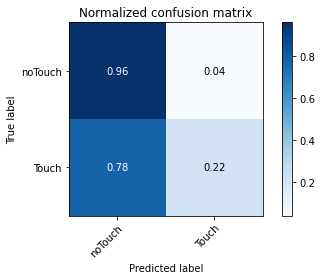

In [199]:
# 5 epochs
plot_confusion_matrix(dataset_6_y[:no_pred_steps_6],facetouch_pred_6,classes=class_names, normalize=True,title='Normalized confusion matrix')

In [169]:
### actual
raw = dataset_6.iloc[:no_pred_steps]
fig = px.scatter(raw, x=raw['#timestamp'], y=raw['right2'], color=compare_frame['Actual Event'])
fig.show()

In [123]:
### predicted
raw = dataset_6.iloc[:no_pred_steps]
fig = px.scatter(raw, x=raw['#timestamp'], y=raw['right2'], color=compare_frame['Predicted Event'])
fig.show()